In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc

In [2]:
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
markers = {'Uniform refinement': 'o',
           'Isotropic adaptation': '^',
           'Anisotropic adaptation': 'x'}
styles = {'Uniform refinement': '-',
          'Isotropic adaptation': '-',
          'Anisotropic adaptation': '-'}
colours = {'Uniform refinement': 'cornflowerblue',
           'Isotropic adaptation': 'orange',
           'Anisotropic adaptation': 'g'}

### Parameter values

Problem setup
* Number of turbines: 2
* Initial mesh: `'xcoarse'`
* Function space: $\mathbb P1_{DG}-\mathbb P2$
* Automatic SIPG parameter: `True`

Solver setup
```
solver_parameters = {
    'mat_type': 'aij',
    'snes_type': 'newtonls',
    'snes_rtol': 1e-3,
    'snes_atol': 1e-16,
    'snes_max_it: 100,
    'snes_linesearch_type': 'bt',
    'snes_monitor': None,
    'ksp_type': 'preonly',
    'pc_type': 'lu',
    'pc_factor_mat_solver_type': 'mumps',
    'mumps_mat_icntl_14': 200,
}
```

Adaptation setup
* Field for adaptation: `all_int`
* Metric normalisation: `'complexity'`
* Convergence rate for optimal element size: 1
* Relative tolerance for QoI: 0.002
* Relative tolerance for number of elements: 0.002
* Relative tolerance for estimator: 0.002
* Maximum number of adaptation iterations: 35

Differences from previous versions:
* Pass $\mathbb P0$ indicator to `AnisotropicMetricDriver`
* Compute error indicator in $V_h^+$ and project _this_ down to $V_h$.

In [6]:
def power2error(x):
    return 100*(x - exact)/exact

def error2power(x):
    return x * exact/100 + exact

In [7]:
xlabel = "Degrees of freedom (DOFs)"
ylabel = r"Power output $(\mathrm{kW})$"
ylabel2 = r"Relative error in power output (\%)"

In [8]:
title = "Convergence plots for aligned turbines"
uniform = {
    'approach': 'Uniform refinement',
    'elements': [1570,     6280,     25120,    100480,   401920],
    'dofs':     [12627,    50373,    201225,   804369,   3216417],
    'qoi':      [4.7995e3, 4.6569e3, 4.6208e3, 4.6177e3, 4.6170e3],
}
isotropic = {
    'approach': 'Isotropic adaptation',
    'elements': [922,      1647,     2920,     5610,     9688,     17030,    33705,    65407],
    'dofs':     [7423,     13222,    23459,    45075,    77775,    136579,   270196,   524368],
    'qoi':      [4.8130e3, 4.7668e3, 4.6695e3, 4.6456e3, 4.6298e3, 4.6221e3, 4.6182e3, 4.6170e3],
}
anisotropic = {
    'approach': 'Anisotropic adaptation',
    'elements': [1022,     1699,     2210,     3538,     6322,     11741,    20041,    37586,    73406],
    'dofs':     [8219,     13642,    17737,    28391,    50715,    94184,    160638,   301221,   588097],
    'qoi':      [4.7966e3, 4.6587e3, 4.6445e3, 4.6261e3, 4.6207e3, 4.6180e3, 4.6155e3, 4.6161e3, 4.6156e3],
}
data = [uniform, isotropic, anisotropic]
exact = uniform['qoi'][-1]

<IPython.core.display.Javascript object>


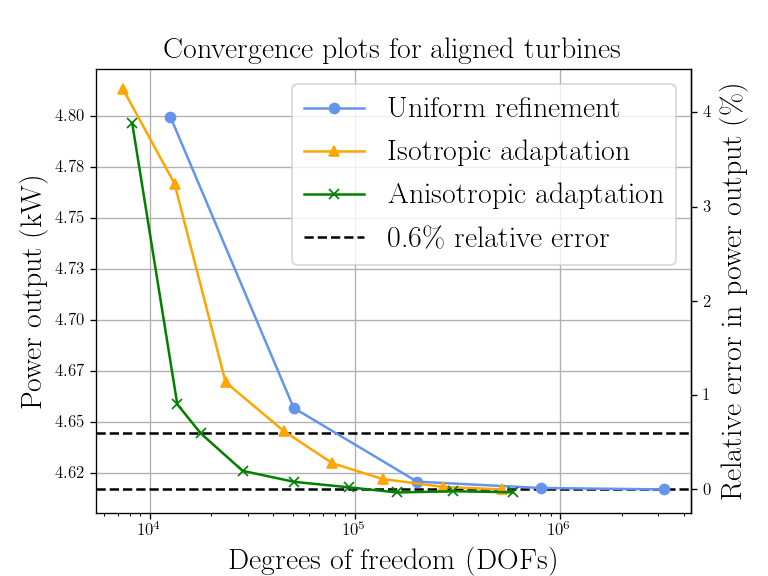

In [10]:
plt.figure()
ax = plt.gca()
for d in data:
    if not 'control' in d['approach']:
        approach = d['approach']
        plt.semilogx(d['dofs'], d['qoi'], label=approach, color=colours[approach], linestyle=styles[approach], marker=markers[approach])

plt.grid(True)
xlim = ax.get_xlim()
plt.hlines([exact, 1.006*exact], xlim[0], xlim[1], linestyles='dashed', label=r'0.6\% relative error')
plt.xlim(xlim)

yticks = ["{:.2f}".format(1e-3*i) for i in ax.get_yticks().tolist()]
ax.set_yticklabels(yticks)
plt.xlabel(xlabel, fontsize=18)
plt.ylabel(ylabel, fontsize=18)
plt.legend(fontsize=18)

secax = ax.secondary_yaxis('right', functions=(power2error, error2power))
secax.set_ylabel(ylabel2, fontsize=18)
yticks = ["{:.2f}\%".format(i) for i in secax.get_yticks().tolist()]
secax.set_yticklabels(yticks)

plt.savefig('outputs/aligned_2turbine.pdf')
plt.title(title, fontsize=18)
plt.savefig('outputs/aligned_2turbine.png')

In [11]:
title = "Convergence plots for offset turbines"
uniform = {
    'approach': 'Uniform refinement',
    'elements': [1424,     5696,     22784,    91136,    364544],
    'dofs':     [11459,    45701,    182537,   729617,   2917409],
    'qoi':      [5.2592e3, 5.1140e3, 5.0770e3, 5.0720e3, 5.0719e3],
}
isotropic = {
    'approach': 'Isotropic adaptation',
    'elements': [510,      631,      1060,     1750,     2932,     5278,     9511,     16669,    33904,    65108],
    'dofs':     [4115,     5086,     8515,     14047,    23531,    42355,    76342,    133658,   271725,   521835],
    'qoi':      [5.2660e3, 5.1520e3, 5.0806e3, 5.0928e3, 5.0984e3, 5.0851e3, 5.0790e3, 5.0762e3, 5.0735e3, 5.0724e3],
}
anisotropic = {
    'approach': 'Anisotropic adaptation',
    'elements': [543,      697,      1109,     2087,     3517,     5671,     11348,    19545,    37134,    71807],
    'dofs':     [4376,     5608,     8918,     16746,    28212,    45474,    90985,    156656,   297531,   575210],
    'qoi':      [5.2524e3, 5.1950e3, 5.1409e3, 5.1022e3, 5.0851e3, 5.0760e3, 5.0728e3, 5.0723e3, 5.0717e3, 5.0717e3],
}

data = [uniform, isotropic, anisotropic]
exact = uniform['qoi'][-1]

<IPython.core.display.Javascript object>


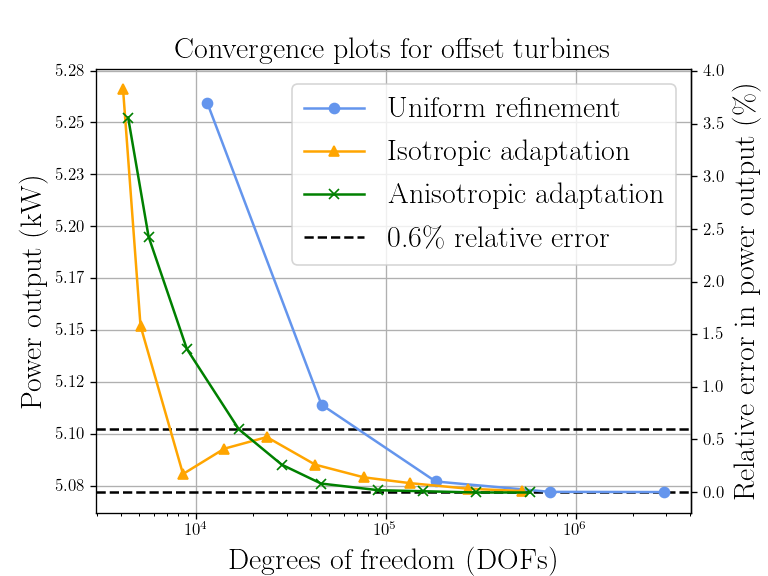

In [13]:
plt.figure()
ax = plt.gca()
for d in data:
    if not 'control' in d['approach']:
        approach = d['approach']
        plt.semilogx(d['dofs'], d['qoi'], label=approach, color=colours[approach], linestyle=styles[approach], marker=markers[approach])

plt.grid(True)
xlim = ax.get_xlim()
plt.hlines([exact, 1.006*exact], xlim[0], xlim[1], linestyles='dashed', label=r'0.6\% relative error')
plt.xlim(xlim)
        
yticks = ["{:.2f}".format(1e-3*i) for i in ax.get_yticks().tolist()]
ax.set_yticklabels(yticks)
plt.xlabel(xlabel, fontsize=18)
plt.ylabel(ylabel, fontsize=18)
plt.legend(fontsize=18)

secax = ax.secondary_yaxis('right', functions=(power2error, error2power))
secax.set_ylabel(ylabel2, fontsize=18)
yticks = ["{:.2f}\%".format(i) for i in secax.get_yticks().tolist()]
secax.set_yticklabels(yticks)

plt.savefig('outputs/offset_2turbine.pdf')
plt.title(title, fontsize=18)
plt.savefig('outputs/offset_2turbine.png')